#Rough Set

In [1]:
#Impor Library Rough Set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("wine.csv",sep=';')
df

,FA,VA,CA,RS,chlorides,FSD,TSD,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
395,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
396,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
397,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
398,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [3]:
df=df.iloc[::,1:]         
#df=df.iloc[::,:-1] #memisahkan antara variabel x dan y
df

,VA,CA,RS,chlorides,FSD,TSD,density,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...
395,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
396,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
397,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
398,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [4]:
#melakukan encoding (mengganti kategori menjadi angka)
df['quality'].value_counts()

bad     232
good    168
Name: quality, dtype: int64

In [5]:
#Encoding dengan data sedikit
cleanup_nums = {"quality":     {"good": 1, "bad": 2}}
df = df.replace(cleanup_nums)
df

,VA,CA,RS,chlorides,FSD,TSD,density,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...
395,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
396,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
397,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
398,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


#Core and Reduct

In [6]:
def indiscrenibility(faktor):
    df_r = faktor.groupby(list(faktor)).apply(lambda x: tuple(x.index)).tolist()
    df_baru=[]
    for i in df_r:
        dfb=list(i)
        df_baru.append(dfb)
    return df_baru

In [7]:
def Core_and_Reduct(faktor):
    R=indiscrenibility(faktor)
    kolom=list(faktor.columns)
    indis_vector=[]
    for k in kolom:
        k=str(k) 
        df2=faktor.drop(columns=[k])
        K=indiscrenibility(df2)
        if (K==R):
            indis=True
            indis_vector.append(indis) 
        else:
            indis=False
            indis_vector.append(indis) 
    
    indeks = []
    for i in range(len(indis_vector)):
        if indis_vector[i] == False:
            indeks.append(i)
    indis_var = [kolom[i] for i in indeks] 
    df_CR=faktor[indis_var]
    # Mengembalikan Faktor Utama
    df_CR['quality']=faktor.iloc[::,-1]
    return df_CR

In [8]:
df_CR=Core_and_Reduct(df)
df_CR

,VA,CA,RS,chlorides,quality
0,0.700,0.00,1.9,0.076,2
1,0.880,0.00,2.6,0.098,2
2,0.760,0.04,2.3,0.092,2
3,0.700,0.00,1.9,0.076,2
4,0.660,0.00,1.8,0.075,2
...,...,...,...,...,...
395,0.600,0.08,2.0,0.090,2
396,0.550,0.10,2.2,0.062,1
397,0.510,0.13,2.3,0.076,1
398,0.645,0.12,2.0,0.075,2


In [9]:
df_CR.to_csv('hasilroughset.csv') 

#Fuzzy

In [10]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings('ignore')

In [11]:
df_tsk=pd.read_csv('hasilroughset.csv',sep=',')
df_tsk

,Unnamed: 0,VA,CA,RS,chlorides,quality
0,0,0.700,0.00,1.9,0.076,2
1,1,0.880,0.00,2.6,0.098,2
2,2,0.760,0.04,2.3,0.092,2
3,3,0.700,0.00,1.9,0.076,2
4,4,0.660,0.00,1.8,0.075,2
...,...,...,...,...,...,...
395,395,0.600,0.08,2.0,0.090,2
396,396,0.550,0.10,2.2,0.062,1
397,397,0.510,0.13,2.3,0.076,1
398,398,0.645,0.12,2.0,0.075,2


In [12]:
df_tsk=df_tsk.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_tsk

,VA,CA,RS,chlorides,quality
0,0.700,0.00,1.9,0.076,2
1,0.880,0.00,2.6,0.098,2
2,0.760,0.04,2.3,0.092,2
3,0.700,0.00,1.9,0.076,2
4,0.660,0.00,1.8,0.075,2
...,...,...,...,...,...
395,0.600,0.08,2.0,0.090,2
396,0.550,0.10,2.2,0.062,1
397,0.510,0.13,2.3,0.076,1
398,0.645,0.12,2.0,0.075,2


In [13]:
df_tsk.describe()

,VA,CA,RS,chlorides,quality
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.576425,0.195950,2.478750,0.091637,1.580000
std,0.164473,0.173687,1.428263,0.063558,0.494177
min,0.160000,0.000000,1.200000,0.038000,1.000000
25%,0.460000,0.040000,1.900000,0.070000,1.000000
50%,0.580000,0.160000,2.100000,0.078000,2.000000
75%,0.670000,0.300000,2.400000,0.087000,2.000000
max,1.130000,1.000000,13.800000,0.611000,2.000000


In [14]:
df_tsk.isnull().sum()    #untuk mengecek nilai yang hilang

VA           0
CA           0
RS           0
chlorides    0
quality      0
dtype: int64

In [15]:
df_tsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VA         400 non-null    float64
 1   CA         400 non-null    float64
 2   RS         400 non-null    float64
 3   chlorides  400 non-null    float64
 4   quality    400 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.8 KB


#Info Atribute
1. fixed acidity/keasaman tetap
2. volatile acidity/keasaman yang mudah menguap= (cepat, lambat)
3. citric acid/asam sitrat=(tinggi, rendah) 
4. residual sugar/sisa gula=(banyak, sedikit)
5. chlorides/klorida=(lebih, kurang)
6. free sulfur dioxide/bebas sulfur dioksida
7. total sulfur dioxide/total sulfur dioksida
8. density/kepadatan
9. pH
10. sulphates/sulfat
11. alcohol/alkohol
12. quality ('good' and 'bad' based on score >5 and <5)/kualitas ('baik' dan 'buruk' berdasarkan skor >5 dan <5)


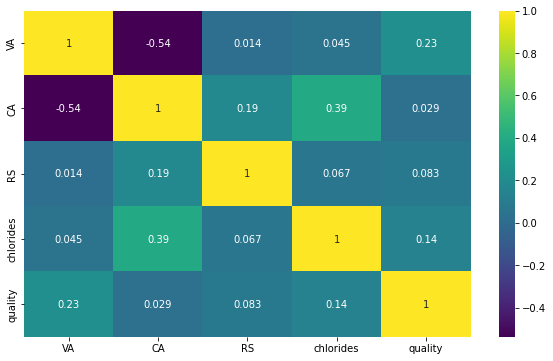

In [16]:
#untuk melihat korelasi data
k=len(df_tsk.columns)
cm=df_tsk.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

# Fuzzyfikasi

##Fuzzy A

In [17]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [18]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[int(x_i)]

    return hasil

##Fuzzy B

In [19]:
def fungsi_segitiga1(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu1 = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu1[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu1[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu1[idx] = 1
    
    return miu1

In [20]:
def miu_fungsi_segitiga1(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu1 = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu1[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu1[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu1[idx] = 1

    dict_fuzzy1=res = {round(array_x[i],2): miu1[i] for i in range(len(array_x))}
    print(dict_fuzzy1)
    hasil1 = dict_fuzzy1[x_i]

    return hasil1

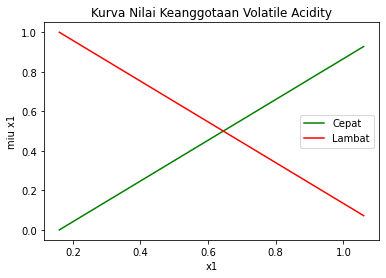

In [21]:
# Pembentukan Himpunan Fuzzy Volatile Acidity [fungsi buat sendiri]
x_VA= np.arange(0.16, 1.13, 0.1) # Semesta Pembicaraan
amb_cepat = [0.16, 1.13, 1.13]
amb_lambat = [0.16, 0.16, 1.13]

miu_VA_cepat = fungsi_segitiga(x_VA, amb_cepat)
miu_VA_lambat = fungsi_segitiga(x_VA, amb_lambat)

import matplotlib.pyplot as plt
plt.plot(x_VA, miu_VA_cepat, label = "Cepat", color='green')
plt.plot(x_VA, miu_VA_lambat, label = "Lambat", color='red')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan Volatile Acidity')
plt.legend()
plt.show()

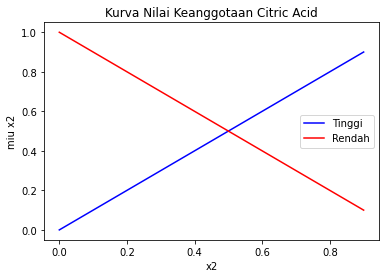

In [22]:
# Pembentukan Himpunan Fuzzy Citric Acid [fungsi buat sendiri]
x_CA= np.arange(0, 1, 0.1) # Semesta Pembicaraan
amb_tinggi  = [0, 1, 1]
amb_rendah = [0, 0, 1]

miu_CA_tinggi  = fungsi_segitiga(x_CA, amb_tinggi)
miu_CA_rendah = fungsi_segitiga(x_CA, amb_rendah)

import matplotlib.pyplot as plt
plt.plot(x_CA, miu_CA_tinggi,  label = "Tinggi",  color='blue')
plt.plot(x_CA, miu_CA_rendah, label = "Rendah", color='red')
plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan Citric Acid')
plt.legend()
plt.show()

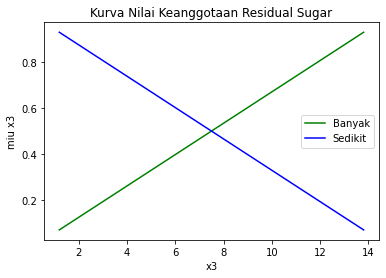

In [23]:
# Pembentukan Himpunan Fuzzy Residual Sugar [fungsi buat sendiri]
x_RS= np.arange(1.2, 13.8, 0.1) # Semesta Pembicaraan
amb_banyak  = [0.2, 14.8, 14.8]
amb_sedikit  = [0.2, 0.2, 14.8]

miu_RS_banyak  = fungsi_segitiga(x_RS, amb_banyak)
miu_RS_sedikit   = fungsi_segitiga(x_RS, amb_sedikit)

import matplotlib.pyplot as plt
plt.plot(x_RS, miu_RS_banyak,  label = "Banyak",  color='green')
plt.plot(x_RS, miu_RS_sedikit, label = "Sedikit", color='blue')
plt.xlabel('x3')
plt.ylabel('miu x3')
plt.title('Kurva Nilai Keanggotaan Residual Sugar')
plt.legend()
plt.show()

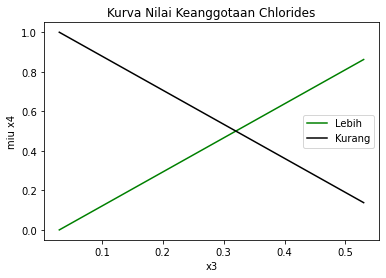

In [24]:
# Pembentukan Himpunan Fuzzy Chlorides [fungsi buat sendiri]
x_chlorides= np.arange(0.03, 0.61, 0.1) # Semesta Pembicaraan
amb_lebih  = [0.03, 0.61, 0.61]
amb_kurang  = [0.03, 0.03, 0.61]

miu_chlorides_lebih  = fungsi_segitiga(x_chlorides, amb_lebih)
miu_chlorides_kurang   = fungsi_segitiga(x_chlorides, amb_kurang)

import matplotlib.pyplot as plt
plt.plot(x_chlorides, miu_chlorides_lebih,  label = "Lebih",  color='green')
plt.plot(x_chlorides, miu_chlorides_kurang, label = "Kurang", color='black')
plt.xlabel('x3')
plt.ylabel('miu x4')
plt.title('Kurva Nilai Keanggotaan Chlorides')
plt.legend()
plt.show()

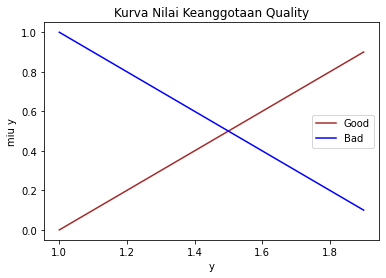

In [25]:
# Pembentukan Himpunan Fuzzy Quality [fungsi buat sendiri]
x_quality= np.arange(1, 2, 0.1) # Semesta Pembicaraan
amb_good  = [1, 2, 2]
amb_bad  = [1, 1, 2]

miu_quality_good  = fungsi_segitiga(x_quality, amb_good)
miu_quality_bad   = fungsi_segitiga(x_quality, amb_bad)

import matplotlib.pyplot as plt
plt.plot(x_quality, miu_quality_good,  label = "Good",  color='brown')
plt.plot(x_quality, miu_quality_bad, label = "Bad", color='blue')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan Quality')
plt.legend()
plt.show()

In [26]:
def fuzzyfikasi(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))/2
    print(batas)
    hasil=0
    if x < batas:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    return hasil, label_hasil

In [27]:
def fuzzyfikasi1(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))/2
    print(batas)
    hasil1=0
    if x < batas:
        hasil1=miu_fungsi_segitiga1(x_array, amd_1, x)
        label_hasil1 = label_1
    else:
        hasil1=miu_fungsi_segitiga1(x_array, amd_2, x)
        label_hasil1 = label_2
    return hasil1, label_hasil1

In [28]:
x_VA= np.arange(0, 1.13, 0.1)
amb_cepat = [0.16, 1.13, 1.13]
amb_lambat = [0.16, 0.16, 1.13]

fuzzifikasi_VA=[]
miu_VA=[]
for i in df.VA:
    hasil=fuzzyfikasi(x_VA, amb_cepat, amb_lambat, i, "Cepat", "Lambat")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_VA.append(fuzz)
    miu_VA.append(m)
    
len(fuzzifikasi_VA)

0.55
{0.0: 0.0, 0.1: 0.0, 0.2: 0.9587628865979382, 0.3: 0.8556701030927835, 0.4: 0.7525773195876289, 0.5: 0.6494845360824743, 0.6: 0.5463917525773194, 0.7: 0.4432989690721648, 0.8: 0.3402061855670102, 0.9: 0.23711340206185558, 1.0: 0.13402061855670094, 1.1: 0.030927835051546195}
0.55
{0.0: 0.0, 0.1: 0.0, 0.2: 0.9587628865979382, 0.3: 0.8556701030927835, 0.4: 0.7525773195876289, 0.5: 0.6494845360824743, 0.6: 0.5463917525773194, 0.7: 0.4432989690721648, 0.8: 0.3402061855670102, 0.9: 0.23711340206185558, 1.0: 0.13402061855670094, 1.1: 0.030927835051546195}
0.55
{0.0: 0.0, 0.1: 0.0, 0.2: 0.9587628865979382, 0.3: 0.8556701030927835, 0.4: 0.7525773195876289, 0.5: 0.6494845360824743, 0.6: 0.5463917525773194, 0.7: 0.4432989690721648, 0.8: 0.3402061855670102, 0.9: 0.23711340206185558, 1.0: 0.13402061855670094, 1.1: 0.030927835051546195}
0.55
{0.0: 0.0, 0.1: 0.0, 0.2: 0.9587628865979382, 0.3: 0.8556701030927835, 0.4: 0.7525773195876289, 0.5: 0.6494845360824743, 0.6: 0.5463917525773194, 0.7: 0.44

400

In [29]:
x_CA= np.arange(0, 2, 0.1) 
amb_tinggi  = [0, 1, 1]
amb_rendah = [0, 0, 1]

fuzzifikasi_CA=[]
miu_CA=[]
for i in df.CA:
    hasil=fuzzyfikasi(x_CA, amb_tinggi, amb_rendah, i, "Tinggi", "Rendah")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_CA.append(fuzz)
    miu_CA.append(m)

len(fuzzifikasi_CA)

0.9500000000000001
{0.0: 0.0, 0.1: 0.1, 0.2: 0.2, 0.3: 0.30000000000000004, 0.4: 0.4, 0.5: 0.5, 0.6: 0.6000000000000001, 0.7: 0.7000000000000001, 0.8: 0.8, 0.9: 0.9, 1.0: 1.0, 1.1: 0.0, 1.2: 0.0, 1.3: 0.0, 1.4: 0.0, 1.5: 0.0, 1.6: 0.0, 1.7: 0.0, 1.8: 0.0, 1.9: 0.0}
0.9500000000000001
{0.0: 0.0, 0.1: 0.1, 0.2: 0.2, 0.3: 0.30000000000000004, 0.4: 0.4, 0.5: 0.5, 0.6: 0.6000000000000001, 0.7: 0.7000000000000001, 0.8: 0.8, 0.9: 0.9, 1.0: 1.0, 1.1: 0.0, 1.2: 0.0, 1.3: 0.0, 1.4: 0.0, 1.5: 0.0, 1.6: 0.0, 1.7: 0.0, 1.8: 0.0, 1.9: 0.0}
0.9500000000000001
{0.0: 0.0, 0.1: 0.1, 0.2: 0.2, 0.3: 0.30000000000000004, 0.4: 0.4, 0.5: 0.5, 0.6: 0.6000000000000001, 0.7: 0.7000000000000001, 0.8: 0.8, 0.9: 0.9, 1.0: 1.0, 1.1: 0.0, 1.2: 0.0, 1.3: 0.0, 1.4: 0.0, 1.5: 0.0, 1.6: 0.0, 1.7: 0.0, 1.8: 0.0, 1.9: 0.0}
0.9500000000000001
{0.0: 0.0, 0.1: 0.1, 0.2: 0.2, 0.3: 0.30000000000000004, 0.4: 0.4, 0.5: 0.5, 0.6: 0.6000000000000001, 0.7: 0.7000000000000001, 0.8: 0.8, 0.9: 0.9, 1.0: 1.0, 1.1: 0.0, 1.2: 0.0, 1.3: 0

400

In [30]:
x_RS= np.arange(0.2, 14.8, 0.1)
amb_banyak  = [0.2, 14.8, 14.8]
amb_sedikit  = [0.2, 0.2, 14.8]

fuzzifikasi_RS=[]
miu_RS=[]
for i in df.RS:
    hasil=fuzzyfikasi(x_RS, amb_banyak, amb_sedikit, i, "Banyak", "Sedikit")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_RS.append(fuzz)
    miu_RS.append(m)
len(fuzzifikasi_RS)

7.450000000000002
{0.2: 0.0, 0.3: 0.006849315068493152, 0.4: 0.013698630136986304, 0.5: 0.020547945205479458, 0.6: 0.027397260273972605, 0.7: 0.034246575342465765, 0.8: 0.04109589041095892, 0.9: 0.04794520547945206, 1.0: 0.054794520547945216, 1.1: 0.061643835616438374, 1.2: 0.06849315068493153, 1.3: 0.07534246575342467, 1.4: 0.08219178082191783, 1.5: 0.08904109589041098, 1.6: 0.09589041095890412, 1.7: 0.10273972602739728, 1.8: 0.10958904109589043, 1.9: 0.1164383561643836, 2.0: 0.12328767123287676, 2.1: 0.13013698630136988, 2.2: 0.13698630136986306, 2.3: 0.14383561643835618, 2.4: 0.15068493150684933, 2.5: 0.1575342465753425, 2.6: 0.16438356164383566, 2.7: 0.1712328767123288, 2.8: 0.17808219178082196, 2.9: 0.1849315068493151, 3.0: 0.19178082191780824, 3.1: 0.19863013698630141, 3.2: 0.20547945205479456, 3.3: 0.21232876712328771, 3.4: 0.21917808219178087, 3.5: 0.22602739726027404, 3.6: 0.2328767123287672, 3.7: 0.23972602739726034, 3.8: 0.2465753424657535, 3.9: 0.25342465753424664, 4.0: 0.2

400

In [31]:
x_chlorides= np.arange(0, 0.61, 0.1) # Semesta Pembicaraan
amb_lebih  = [0.03, 0.61, 0.61]
amb_kurang  = [0.03, 0.03, 0.61]

fuzzifikasi_chlorides=[]
miu_chlorides=[]
for i in df.chlorides:
    hasil=fuzzyfikasi(x_chlorides, amb_lebih, amb_kurang, i, "Lebih", "Kurang")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_chlorides.append(fuzz)
    miu_chlorides.append(m)
len(fuzzifikasi_chlorides)

0.30000000000000004
{0.0: 0.0, 0.1: 0.12068965517241381, 0.2: 0.2931034482758621, 0.3: 0.4655172413793104, 0.4: 0.6379310344827587, 0.5: 0.810344827586207, 0.6: 0.9827586206896554}
0.30000000000000004
{0.0: 0.0, 0.1: 0.12068965517241381, 0.2: 0.2931034482758621, 0.3: 0.4655172413793104, 0.4: 0.6379310344827587, 0.5: 0.810344827586207, 0.6: 0.9827586206896554}
0.30000000000000004
{0.0: 0.0, 0.1: 0.12068965517241381, 0.2: 0.2931034482758621, 0.3: 0.4655172413793104, 0.4: 0.6379310344827587, 0.5: 0.810344827586207, 0.6: 0.9827586206896554}
0.30000000000000004
{0.0: 0.0, 0.1: 0.12068965517241381, 0.2: 0.2931034482758621, 0.3: 0.4655172413793104, 0.4: 0.6379310344827587, 0.5: 0.810344827586207, 0.6: 0.9827586206896554}
0.30000000000000004
{0.0: 0.0, 0.1: 0.12068965517241381, 0.2: 0.2931034482758621, 0.3: 0.4655172413793104, 0.4: 0.6379310344827587, 0.5: 0.810344827586207, 0.6: 0.9827586206896554}
0.30000000000000004
{0.0: 0.0, 0.1: 0.12068965517241381, 0.2: 0.2931034482758621, 0.3: 0.465517

400

In [32]:
x_quality= np.arange(1, 3, 0.1) # Semesta Pembicaraan
amb_good  = [1, 2, 2]
amb_bad  = [1, 1, 2]

fuzzifikasi_quality=[]
miu_quality=[]
for i in df.quality:
    hasil=fuzzyfikasi(x_quality, amb_good, amb_bad, i, "Good", "Bad")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_quality.append(fuzz)
    miu_quality.append(m)
len(fuzzifikasi_quality)

1.9500000000000008
{1.0: 1.0, 1.1: 0.8999999999999999, 1.2: 0.7999999999999998, 1.3: 0.6999999999999997, 1.4: 0.5999999999999996, 1.5: 0.49999999999999956, 1.6: 0.39999999999999947, 1.7: 0.2999999999999994, 1.8: 0.1999999999999993, 1.9: 0.0999999999999992, 2.0: 0.0, 2.1: 0.0, 2.2: 0.0, 2.3: 0.0, 2.4: 0.0, 2.5: 0.0, 2.6: 0.0, 2.7: 0.0, 2.8: 0.0, 2.9: 0.0}
1.9500000000000008
{1.0: 1.0, 1.1: 0.8999999999999999, 1.2: 0.7999999999999998, 1.3: 0.6999999999999997, 1.4: 0.5999999999999996, 1.5: 0.49999999999999956, 1.6: 0.39999999999999947, 1.7: 0.2999999999999994, 1.8: 0.1999999999999993, 1.9: 0.0999999999999992, 2.0: 0.0, 2.1: 0.0, 2.2: 0.0, 2.3: 0.0, 2.4: 0.0, 2.5: 0.0, 2.6: 0.0, 2.7: 0.0, 2.8: 0.0, 2.9: 0.0}
1.9500000000000008
{1.0: 1.0, 1.1: 0.8999999999999999, 1.2: 0.7999999999999998, 1.3: 0.6999999999999997, 1.4: 0.5999999999999996, 1.5: 0.49999999999999956, 1.6: 0.39999999999999947, 1.7: 0.2999999999999994, 1.8: 0.1999999999999993, 1.9: 0.0999999999999992, 2.0: 0.0, 2.1: 0.0, 2.2: 0.0,

400

In [33]:
df_fuzz = pd.DataFrame({"VA":df.VA,
                        "CA":df.CA,
                        "RS":df.RS,
                        "chlorides":df.chlorides,
                        "quality":df.quality,
                        "VA_fuzz": fuzzifikasi_VA,
                        "CA_fuzz": fuzzifikasi_CA,
                        "RS_fuzz": fuzzifikasi_RS,
                        "chlorides_fuzz":fuzzifikasi_chlorides,
                        "quality_fuzz":fuzzifikasi_quality,
                        "miu_VA":miu_VA,
                        "miu_CA":miu_CA,
                        "miu_RS":miu_RS,
                        "miu_chlorides": miu_chlorides,
                        "miu_quality": miu_quality})
df_fuzz

,VA,CA,RS,chlorides,quality,VA_fuzz,CA_fuzz,RS_fuzz,chlorides_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_chlorides,miu_quality
0,0.700,0.00,1.9,0.076,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0
1,0.880,0.00,2.6,0.098,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0
2,0.760,0.04,2.3,0.092,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0
3,0.700,0.00,1.9,0.076,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0
4,0.660,0.00,1.8,0.075,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.600,0.08,2.0,0.090,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0
396,0.550,0.10,2.2,0.062,1,Lambat,Tinggi,Banyak,Lebih,Good,0.0,0.0,0.123288,0.0,0.0
397,0.510,0.13,2.3,0.076,1,Cepat,Tinggi,Banyak,Lebih,Good,0.0,0.0,0.123288,0.0,0.0
398,0.645,0.12,2.0,0.075,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0


# Rule Generation

In [34]:
df_fuzz['Rule'] = " Jika X1 " + df_fuzz['VA_fuzz'] + " dan X2 " + df_fuzz['CA_fuzz'] + " dan X3 " + df_fuzz['RS_fuzz'] + " dan X4 " + df_fuzz['chlorides_fuzz'] + " maka Y " + df_fuzz['quality_fuzz']
df_fuzz

,VA,CA,RS,chlorides,quality,VA_fuzz,CA_fuzz,RS_fuzz,chlorides_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_chlorides,miu_quality,Rule
0,0.700,0.00,1.9,0.076,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...
1,0.880,0.00,2.6,0.098,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...
2,0.760,0.04,2.3,0.092,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...
3,0.700,0.00,1.9,0.076,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...
4,0.660,0.00,1.8,0.075,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.600,0.08,2.0,0.090,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...
396,0.550,0.10,2.2,0.062,1,Lambat,Tinggi,Banyak,Lebih,Good,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...
397,0.510,0.13,2.3,0.076,1,Cepat,Tinggi,Banyak,Lebih,Good,0.0,0.0,0.123288,0.0,0.0,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan...
398,0.645,0.12,2.0,0.075,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...


In [35]:
df_fuzz.to_excel('hasilRule.xlsx') 

In [36]:
df_fuzz['Rule'].value_counts()

 Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Lebih maka Y Bad      144
 Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Lebih maka Y Good       88
 Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Lebih maka Y Good      78
 Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Lebih maka Y Bad        73
 Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Kurang maka Y Bad       5
 Jika X1 Lambat dan X2 Tinggi dan X3 Sedikit dan X4 Lebih maka Y Bad       4
 Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Kurang maka Y Bad        3
 Jika X1 Cepat dan X2 Tinggi dan X3 Sedikit dan X4 Lebih maka Y Bad        2
 Jika X1 Cepat dan X2 Tinggi dan X3 Sedikit dan X4 Lebih maka Y Good       1
 Jika X1 Lambat dan X2 Tinggi dan X3 Sedikit dan X4 Lebih maka Y Good      1
 Jika X1 Cepat dan X2 Rendah dan X3 Banyak dan X4 Kurang maka Y Bad        1
Name: Rule, dtype: int64

# TSK Prediction

In [37]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Rule 1

In [38]:
# Rule 1
rule_1 = df_fuzz[df_fuzz['Rule']==" Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Lebih maka Y Bad"]
index=rule_1.index

data_rule_1=df_fuzz.iloc[index,:5]

X1=np.array(data_rule_1.iloc[::,:-1])
#Y=np.array(data_rule_1.iloc[::,:1])
Y1=np.array(data_rule_1.iloc[:,2])

data_rule_1.head()

,VA,CA,RS,chlorides,quality
0,0.70,0.00,1.9,0.076,2
1,0.88,0.00,2.6,0.098,2
2,0.76,0.04,2.3,0.092,2
3,0.70,0.00,1.9,0.076,2
4,0.66,0.00,1.8,0.075,2


In [39]:
data_rule_1.to_csv('hasilrule1.csv') 

###MINI BATCH GRADIENT DESCENT

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [41]:
df_rule1=pd.read_csv('hasilrule1.csv',sep=',')
df_rule1

,Unnamed: 0,VA,CA,RS,chlorides,quality
0,0,0.700,0.00,1.9,0.076,2
1,1,0.880,0.00,2.6,0.098,2
2,2,0.760,0.04,2.3,0.092,2
3,3,0.700,0.00,1.9,0.076,2
4,4,0.660,0.00,1.8,0.075,2
...,...,...,...,...,...,...
139,383,0.695,0.13,2.0,0.076,2
140,384,0.560,0.13,1.6,0.077,2
141,388,0.690,0.32,2.2,0.069,2
142,395,0.600,0.08,2.0,0.090,2


In [42]:
df_rule1=df_rule1.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_rule1

,VA,CA,RS,chlorides,quality
0,0.700,0.00,1.9,0.076,2
1,0.880,0.00,2.6,0.098,2
2,0.760,0.04,2.3,0.092,2
3,0.700,0.00,1.9,0.076,2
4,0.660,0.00,1.8,0.075,2
...,...,...,...,...,...
139,0.695,0.13,2.0,0.076,2
140,0.560,0.13,1.6,0.077,2
141,0.690,0.32,2.2,0.069,2
142,0.600,0.08,2.0,0.090,2


In [43]:
from sklearn import preprocessing
sx1 = preprocessing.MinMaxScaler()
sy1 = preprocessing.MinMaxScaler()

scaled_X1 = sx1.fit_transform(data_rule_1.drop('quality',axis='columns'))
scaled_y1 = sy1.fit_transform(data_rule_1['quality'].values.reshape(rule_1.shape[0],1))

scaled_X1

array([[0.24561404, 0.        , 0.12727273, 0.15283843],
       [0.56140351, 0.        , 0.25454545, 0.2489083 ],
       [0.35087719, 0.07407407, 0.2       , 0.22270742],
       [0.24561404, 0.        , 0.12727273, 0.15283843],
       [0.1754386 , 0.        , 0.10909091, 0.14847162],
       [0.07017544, 0.11111111, 0.07272727, 0.12227074],
       [0.03508772, 0.14814815, 0.10909091, 0.24454148],
       [0.16666667, 0.22222222, 0.2       , 0.18340611],
       [1.        , 0.16666667, 0.05454545, 0.5720524 ],
       [0.10526316, 0.14814815, 0.10909091, 0.15283843],
       [0.80701754, 0.07407407, 0.03636364, 0.01746725],
       [0.37719298, 0.        , 0.32727273, 0.26637555],
       [0.59649123, 0.11111111, 0.23636364, 0.16593886],
       [0.02631579, 0.40740741, 0.16363636, 0.15720524],
       [0.02631579, 0.40740741, 0.16363636, 0.15720524],
       [0.07017544, 0.05555556, 0.10909091, 0.23580786],
       [0.07017544, 0.05555556, 0.10909091, 0.23580786],
       [0.21052632, 0.        ,

In [44]:
scaled_y1_reshape=scaled_y1.reshape(scaled_y1.shape[0],)
scaled_y1_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
def mini_batch_gradient_descent_rule1(X1, y1, iterasi, batch_size = 5, learning_rate = 0.1):

    jumlah_variabel_rule1 = X1.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule1 = np.ones(shape=(jumlah_variabel_rule1))       # b1, b2, ... b(jumlah variabel)
    b0_rule1 = 0                                         # b0 atau bias
    n = X1.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule1_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule1_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule1_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule1 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X1_smntr = X1[random_indices]
        y1_smntr = y1[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule1 = X1_smntr[j:j+batch_size]
            yj_rule1 = y1_smntr[j:j+batch_size]
            
            y1_pred = np.dot(bpoly_rule1, Xj_rule1.T) + b0_rule1           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule1_grad = -(2/len(Xj_rule1))*(Xj_rule1.T.dot(yj_rule1-y1_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule1_grad = -(2/len(Xj_rule1))*np.sum(yj_rule1-y1_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule1 = bpoly_rule1 - learning_rate * bpoly_rule1_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule1 = b0_rule1 - learning_rate * b0_rule1_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule1 in range(jumlah_variabel_rule1):
                bp_rule1=bpoly_rule1[jv_rule1]
                bp.append(bp_rule1)
            b_rule1=[b0_rule1]+bp
        
            cost_rule1 = np.mean(np.square(yj_rule1-y1_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule1_list.append(cost_rule1)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule1_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule1_list.append(b_rule1)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule1, b0_rule1, cost_rule1, b_rule1_list, cost_rule1_list, iterasi_rule1_list  # Output

In [46]:
import time
mulai_rule1 = time.time()
mb_bpoly_rule1, mb_b0_rule1, mb_cost_rule1, mb_b_rule1_list, mb_cost_rule1_list, mb_iterasi_rule1_list=mini_batch_gradient_descent_rule1 (scaled_X1, 
                                                                                                                                        scaled_y1_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule1 = time.time()
waktu_komputasi_rule1 = (selesai_rule1 - mulai_rule1)
print("Waktu Komputasi Rule 1: ",waktu_komputasi_rule1)

Waktu Komputasi Rule 1:  12.485218286514282


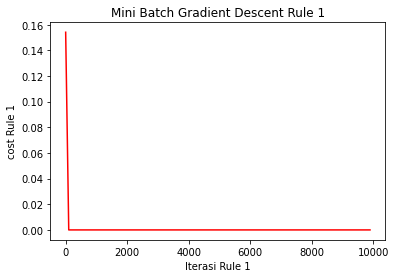

In [47]:
plt.xlabel("Iterasi Rule 1")
plt.ylabel("cost Rule 1")
plt.title("Mini Batch Gradient Descent Rule 1")
plt.plot(mb_iterasi_rule1_list,mb_cost_rule1_list, color='red', label='Eror')
plt.show()

In [48]:
mb_cost_rule1

0.0

In [49]:
mb_b0_rule1

2.5e-323

In [50]:
mb_bpoly_rule1 #hasil untuk x1 dan x2

array([-7.9e-323, -6.4e-323, -2.5e-323,  5.9e-323])

In [51]:
data_rule_1

,VA,CA,RS,chlorides,quality
0,0.700,0.00,1.9,0.076,2
1,0.880,0.00,2.6,0.098,2
2,0.760,0.04,2.3,0.092,2
3,0.700,0.00,1.9,0.076,2
4,0.660,0.00,1.8,0.075,2
...,...,...,...,...,...
383,0.695,0.13,2.0,0.076,2
384,0.560,0.13,1.6,0.077,2
388,0.690,0.32,2.2,0.069,2
395,0.600,0.08,2.0,0.090,2


In [52]:
X1=np.array(data_rule_1.iloc[::,:-1])
X1

array([[0.7  , 0.   , 1.9  , 0.076],
       [0.88 , 0.   , 2.6  , 0.098],
       [0.76 , 0.04 , 2.3  , 0.092],
       [0.7  , 0.   , 1.9  , 0.076],
       [0.66 , 0.   , 1.8  , 0.075],
       [0.6  , 0.06 , 1.6  , 0.069],
       [0.58 , 0.08 , 1.8  , 0.097],
       [0.655, 0.12 , 2.3  , 0.083],
       [1.13 , 0.09 , 1.5  , 0.172],
       [0.62 , 0.08 , 1.8  , 0.076],
       [1.02 , 0.04 , 1.4  , 0.045],
       [0.775, 0.   , 3.   , 0.102],
       [0.9  , 0.06 , 2.5  , 0.079],
       [0.575, 0.22 , 2.1  , 0.077],
       [0.575, 0.22 , 2.1  , 0.077],
       [0.6  , 0.03 , 1.8  , 0.095],
       [0.6  , 0.03 , 1.8  , 0.095],
       [0.68 , 0.   , 2.2  , 0.073],
       [0.95 , 0.03 , 2.   , 0.09 ],
       [0.885, 0.03 , 1.8  , 0.058],
       [0.805, 0.   , 2.5  , 0.068],
       [0.61 , 0.14 , 2.4  , 0.067],
       [0.61 , 0.14 , 2.4  , 0.067],
       [0.61 , 0.49 , 2.   , 0.27 ],
       [0.73 , 0.02 , 2.5  , 0.076],
       [0.61 , 0.2  , 1.8  , 0.077],
       [0.705, 0.1  , 2.6  , 0.084],
 

In [53]:
Y1=np.array(data_rule_1.iloc[:,2])  #mengambil angka dari kolom
Y1

array([1.9 , 2.6 , 2.3 , 1.9 , 1.8 , 1.6 , 1.8 , 2.3 , 1.5 , 1.8 , 1.4 ,
       3.  , 2.5 , 2.1 , 2.1 , 1.8 , 1.8 , 2.2 , 2.  , 1.8 , 2.5 , 2.4 ,
       2.4 , 2.  , 2.5 , 1.8 , 2.6 , 2.2 , 2.  , 1.7 , 1.9 , 3.2 , 2.1 ,
       2.  , 2.7 , 1.9 , 6.6 , 2.6 , 2.3 , 2.3 , 3.6 , 2.2 , 3.1 , 3.  ,
       1.8 , 1.8 , 2.2 , 2.2 , 2.8 , 2.  , 2.  , 3.  , 2.4 , 2.5 , 1.8 ,
       1.8 , 1.8 , 1.6 , 1.5 , 2.3 , 3.4 , 2.1 , 2.8 , 1.7 , 1.7 , 2.1 ,
       1.6 , 2.1 , 2.  , 2.  , 2.6 , 4.5 , 4.5 , 1.9 , 1.9 , 4.3 , 4.3 ,
       1.4 , 1.9 , 2.  , 2.1 , 1.8 , 1.8 , 2.8 , 2.  , 1.9 , 1.9 , 2.3 ,
       5.4 , 2.  , 1.7 , 1.6 , 3.8 , 1.2 , 2.  , 1.4 , 2.1 , 2.1 , 1.8 ,
       3.4 , 1.8 , 1.8 , 6.1 , 2.4 , 1.3 , 3.9 , 1.6 , 2.  , 2.1 , 2.1 ,
       1.9 , 1.9 , 1.9 , 3.75, 1.8 , 1.5 , 2.1 , 2.  , 2.1 , 1.9 , 1.6 ,
       1.5 , 4.3 , 2.4 , 1.8 , 2.6 , 2.8 , 2.5 , 2.3 , 2.3 , 2.2 , 2.2 ,
       6.7 , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 1.6 , 2.2 , 2.  ,
       2.  ])

In [54]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X1_poly = poly_reg.fit_transform(X1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X1_poly, Y1) 
# Proses Training Model
poly_reg.fit(X1, Y1) 

# Memprediksi hasil dengan regresi polynomial
y1_pred=lin_reg_2.predict(poly_reg.fit_transform(X1))
y1_pred

data_rule_1['pred'] = y1_pred
data_rule_1

,VA,CA,RS,chlorides,quality,pred
0,0.700,0.00,1.9,0.076,2,1.9
1,0.880,0.00,2.6,0.098,2,2.6
2,0.760,0.04,2.3,0.092,2,2.3
3,0.700,0.00,1.9,0.076,2,1.9
4,0.660,0.00,1.8,0.075,2,1.8
...,...,...,...,...,...,...
383,0.695,0.13,2.0,0.076,2,2.0
384,0.560,0.13,1.6,0.077,2,1.6
388,0.690,0.32,2.2,0.069,2,2.2
395,0.600,0.08,2.0,0.090,2,2.0


##Rule 2


In [55]:
# Rule 2
rule_2 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Lebih maka Y Good"]
index=rule_2.index
data_rule_2=df_fuzz.iloc[index,:5]
data_rule_2

,VA,CA,RS,chlorides,quality
16,0.380,0.28,2.1,0.066,1
18,0.500,0.04,2.1,0.068,1
20,0.510,0.15,2.8,0.110,1
23,0.490,0.28,1.9,0.110,1
31,0.545,0.18,1.9,0.080,1
...,...,...,...,...,...
386,0.360,0.53,2.2,0.230,1
387,0.380,0.14,2.2,0.038,1
393,0.510,0.13,2.3,0.076,1
397,0.510,0.13,2.3,0.076,1


In [56]:
data_rule_2.to_csv('hasilrule2.csv') 

###MINI BATCH GRADIENT DESCENT

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [58]:
df_rule2=pd.read_csv('hasilrule2.csv',sep=',')
df_rule2

,Unnamed: 0,VA,CA,RS,chlorides,quality
0,16,0.380,0.28,2.1,0.066,1
1,18,0.500,0.04,2.1,0.068,1
2,20,0.510,0.15,2.8,0.110,1
3,23,0.490,0.28,1.9,0.110,1
4,31,0.545,0.18,1.9,0.080,1
...,...,...,...,...,...,...
83,386,0.360,0.53,2.2,0.230,1
84,387,0.380,0.14,2.2,0.038,1
85,393,0.510,0.13,2.3,0.076,1
86,397,0.510,0.13,2.3,0.076,1


In [59]:
df_rule2=df_rule2.drop(columns=['Unnamed: 0'])
df_rule2

,VA,CA,RS,chlorides,quality
0,0.380,0.28,2.1,0.066,1
1,0.500,0.04,2.1,0.068,1
2,0.510,0.15,2.8,0.110,1
3,0.490,0.28,1.9,0.110,1
4,0.545,0.18,1.9,0.080,1
...,...,...,...,...,...
83,0.360,0.53,2.2,0.230,1
84,0.380,0.14,2.2,0.038,1
85,0.510,0.13,2.3,0.076,1
86,0.510,0.13,2.3,0.076,1


In [60]:
from sklearn import preprocessing
sx2 = preprocessing.MinMaxScaler()
sy2 = preprocessing.MinMaxScaler()

scaled_X2 = sx2.fit_transform(data_rule_2.drop('quality',axis='columns'))
scaled_y2 = sy2.fit_transform(data_rule_2['quality'].values.reshape(rule_2.shape[0],1))

scaled_X2

array([[0.57142857, 0.4375    , 0.13207547, 0.14583333],
       [0.88311688, 0.0625    , 0.13207547, 0.15625   ],
       [0.90909091, 0.234375  , 0.26415094, 0.375     ],
       [0.85714286, 0.4375    , 0.09433962, 0.375     ],
       [1.        , 0.28125   , 0.09433962, 0.21875   ],
       [0.88311688, 0.46875   , 0.09433962, 0.19270833],
       [1.        , 0.28125   , 0.09433962, 0.21875   ],
       [0.44155844, 0.734375  , 0.13207547, 0.203125  ],
       [0.67532468, 0.265625  , 0.11320755, 0.18229167],
       [0.67532468, 0.265625  , 0.11320755, 0.18229167],
       [0.93506494, 0.65625   , 0.16981132, 0.25520833],
       [0.96103896, 0.9375    , 0.11320755, 0.00520833],
       [0.57142857, 0.09375   , 0.0754717 , 0.20833333],
       [0.54545455, 0.3125    , 0.26415094, 0.27083333],
       [0.38961039, 0.71875   , 0.        , 0.109375  ],
       [0.72727273, 0.734375  , 0.20754717, 0.13020833],
       [0.7012987 , 0.53125   , 0.20754717, 0.21875   ],
       [0.62337662, 0.828125  ,

In [61]:
scaled_y2_reshape=scaled_y2.reshape(scaled_y2.shape[0],)
scaled_y2_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [62]:
def mini_batch_gradient_descent_rule2(X2, y2, iterasi, batch_size = 5, learning_rate = 0.1):

    jumlah_variabel_rule2 = X2.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule2 = np.ones(shape=(jumlah_variabel_rule2))       # b1, b2, ... b(jumlah variabel)
    b0_rule2 = 0                                         # b0 atau bias
    n = X2.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule2_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule2_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule2_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule2 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X2_smntr = X2[random_indices]
        y2_smntr = y2[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule2 = X2_smntr[j:j+batch_size]
            yj_rule2 = y2_smntr[j:j+batch_size]
            
            y2_pred = np.dot(bpoly_rule2, Xj_rule2.T) + b0_rule2           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule2_grad = -(2/len(Xj_rule2))*(Xj_rule2.T.dot(yj_rule2-y2_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule2_grad = -(2/len(Xj_rule2))*np.sum(yj_rule2-y2_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule2 = bpoly_rule2 - learning_rate * bpoly_rule2_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule2 = b0_rule2 - learning_rate * b0_rule2_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule2 in range(jumlah_variabel_rule2):
                bp_rule2=bpoly_rule2[jv_rule2]
                bp.append(bp_rule2)
            b_rule2=[b0_rule2]+bp
        
            cost_rule2 = np.mean(np.square(yj_rule2-y2_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule2_list.append(cost_rule2)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule2_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule2_list.append(b_rule2)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule2, b0_rule2, cost_rule2, b_rule2_list, cost_rule2_list, iterasi_rule2_list  # Output

In [63]:
import time
mulai_rule2 = time.time()
mb_bpoly_rule2, mb_b0_rule2, mb_cost_rule2, mb_b_rule2_list, mb_cost_rule2_list, mb_iterasi_rule2_list=mini_batch_gradient_descent_rule2 (scaled_X2, 
                                                                                                                                        scaled_y2_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule2 = time.time()
waktu_komputasi_rule2 = (selesai_rule2 - mulai_rule2)
print("Waktu Komputasi Rule 2: ",waktu_komputasi_rule2)

Waktu Komputasi Rule 2:  8.590949535369873


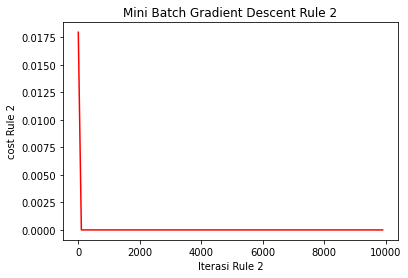

In [64]:
plt.xlabel("Iterasi Rule 2")
plt.ylabel("cost Rule 2")
plt.title("Mini Batch Gradient Descent Rule 2")
plt.plot(mb_iterasi_rule2_list,mb_cost_rule2_list, color='red', label='Eror')
plt.show()

In [65]:
mb_cost_rule2

0.0

In [66]:
mb_b0_rule2

-1.4476036699304286e-180

In [67]:
mb_bpoly_rule2 #hasil untuk x1 dan x2

array([ 1.79414922e-180,  1.66652721e-180, -9.56380427e-181,
       -1.59946918e-180])

In [68]:
data_rule_2

,VA,CA,RS,chlorides,quality
16,0.380,0.28,2.1,0.066,1
18,0.500,0.04,2.1,0.068,1
20,0.510,0.15,2.8,0.110,1
23,0.490,0.28,1.9,0.110,1
31,0.545,0.18,1.9,0.080,1
...,...,...,...,...,...
386,0.360,0.53,2.2,0.230,1
387,0.380,0.14,2.2,0.038,1
393,0.510,0.13,2.3,0.076,1
397,0.510,0.13,2.3,0.076,1


In [69]:
X2=np.array(data_rule_2.iloc[::,:-1])
X2

array([[0.38 , 0.28 , 2.1  , 0.066],
       [0.5  , 0.04 , 2.1  , 0.068],
       [0.51 , 0.15 , 2.8  , 0.11 ],
       [0.49 , 0.28 , 1.9  , 0.11 ],
       [0.545, 0.18 , 1.9  , 0.08 ],
       [0.5  , 0.3  , 1.9  , 0.075],
       [0.545, 0.18 , 1.9  , 0.08 ],
       [0.33 , 0.47 , 2.1  , 0.077],
       [0.42 , 0.17 , 2.   , 0.073],
       [0.42 , 0.17 , 2.   , 0.073],
       [0.52 , 0.42 , 2.3  , 0.087],
       [0.53 , 0.6  , 2.   , 0.039],
       [0.38 , 0.06 , 1.8  , 0.078],
       [0.37 , 0.2  , 2.8  , 0.09 ],
       [0.31 , 0.46 , 1.4  , 0.059],
       [0.44 , 0.47 , 2.5  , 0.063],
       [0.43 , 0.34 , 2.5  , 0.08 ],
       [0.4  , 0.53 , 6.7  , 0.097],
       [0.39 , 0.49 , 1.7  , 0.07 ],
       [0.29 , 0.35 , 1.9  , 0.067],
       [0.48 , 0.3  , 2.8  , 0.066],
       [0.45 , 0.23 , 2.2  , 0.094],
       [0.4  , 0.3  , 1.8  , 0.157],
       [0.25 , 0.46 , 1.7  , 0.062],
       [0.36 , 0.39 , 1.5  , 0.08 ],
       [0.36 , 0.39 , 1.5  , 0.08 ],
       [0.36 , 0.39 , 1.5  , 0.08 ],
 

In [70]:
Y2=np.array(data_rule_2.iloc[:,2])
Y2

array([2.1, 2.1, 2.8, 1.9, 1.9, 1.9, 1.9, 2.1, 2. , 2. , 2.3, 2. , 1.8,
       2.8, 1.4, 2.5, 2.5, 6.7, 1.7, 1.9, 2.8, 2.2, 1.8, 1.7, 1.5, 1.5,
       1.5, 2.5, 1.6, 2.4, 2.4, 1.7, 2.3, 1.8, 1.9, 1.5, 1.8, 1.7, 2.1,
       2.4, 2.4, 2. , 2. , 1.7, 1.9, 1.9, 2.5, 2.4, 2.1, 3. , 1.7, 1.7,
       1.7, 1.7, 1.7, 2.3, 2.5, 2.3, 2. , 2.3, 2.1, 1.6, 1.8, 2. , 2. ,
       2.6, 2.2, 1.8, 2.5, 2.3, 2.3, 2. , 2. , 2. , 2.2, 1.7, 2.2, 2.2,
       2. , 1.9, 4.4, 2.1, 1.9, 2.2, 2.2, 2.3, 2.3, 3.6])

In [71]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X2_poly = poly_reg.fit_transform(X2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X2_poly, Y2) 
# Proses Training Model
poly_reg.fit(X2, Y2) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y2_pred=lin_reg_2.predict(poly_reg.fit_transform(X2))
y2_pred

data_rule_2['pred'] = y2_pred
data_rule_2

,VA,CA,RS,chlorides,quality,pred
16,0.380,0.28,2.1,0.066,1,2.1
18,0.500,0.04,2.1,0.068,1,2.1
20,0.510,0.15,2.8,0.110,1,2.8
23,0.490,0.28,1.9,0.110,1,1.9
31,0.545,0.18,1.9,0.080,1,1.9
...,...,...,...,...,...,...
386,0.360,0.53,2.2,0.230,1,2.2
387,0.380,0.14,2.2,0.038,1,2.2
393,0.510,0.13,2.3,0.076,1,2.3
397,0.510,0.13,2.3,0.076,1,2.3


##Rule 3

In [72]:
# Rule 3
rule_3 = df_fuzz[df_fuzz['Rule']==" Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Lebih maka Y Good"]
index=rule_3.index

data_rule_3=df_fuzz.iloc[index,:5]
data_rule_3

,VA,CA,RS,chlorides,quality
6,0.650,0.00,1.2,0.065,1
7,0.580,0.02,2.0,0.073,1
14,0.645,0.00,5.5,0.086,1
15,0.600,0.14,2.4,0.086,1
27,0.600,0.17,2.3,0.058,1
...,...,...,...,...,...
389,0.610,0.11,1.8,0.066,1
390,0.660,0.33,2.5,0.068,1
392,0.550,0.15,1.8,0.077,1
394,0.620,0.08,1.9,0.068,1


In [73]:
data_rule_2.to_csv('hasilrule3.csv') 

###MINI BATCH GRADIENT DESCENT

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [75]:
df_rule3=pd.read_csv('hasilrule3.csv',sep=',')
df_rule3

,Unnamed: 0,VA,CA,RS,chlorides,quality,pred
0,16,0.380,0.28,2.1,0.066,1,2.1
1,18,0.500,0.04,2.1,0.068,1,2.1
2,20,0.510,0.15,2.8,0.110,1,2.8
3,23,0.490,0.28,1.9,0.110,1,1.9
4,31,0.545,0.18,1.9,0.080,1,1.9
...,...,...,...,...,...,...,...
83,386,0.360,0.53,2.2,0.230,1,2.2
84,387,0.380,0.14,2.2,0.038,1,2.2
85,393,0.510,0.13,2.3,0.076,1,2.3
86,397,0.510,0.13,2.3,0.076,1,2.3


In [76]:
df_rule3=df_rule3.drop(columns=['Unnamed: 0'])
df_rule3

,VA,CA,RS,chlorides,quality,pred
0,0.380,0.28,2.1,0.066,1,2.1
1,0.500,0.04,2.1,0.068,1,2.1
2,0.510,0.15,2.8,0.110,1,2.8
3,0.490,0.28,1.9,0.110,1,1.9
4,0.545,0.18,1.9,0.080,1,1.9
...,...,...,...,...,...,...
83,0.360,0.53,2.2,0.230,1,2.2
84,0.380,0.14,2.2,0.038,1,2.2
85,0.510,0.13,2.3,0.076,1,2.3
86,0.510,0.13,2.3,0.076,1,2.3


In [77]:
from sklearn import preprocessing
sx3 = preprocessing.MinMaxScaler()
sy3 = preprocessing.MinMaxScaler()

scaled_X3 = sx3.fit_transform(data_rule_3.drop('quality',axis='columns'))
scaled_y3 = sy3.fit_transform(data_rule_3['quality'].values.reshape(rule_3.shape[0],1))

scaled_X3

array([[0.22222222, 0.        , 0.        , 0.08717949],
       [0.06666667, 0.03571429, 0.16666667, 0.12820513],
       [0.21111111, 0.        , 0.89583333, 0.19487179],
       [0.11111111, 0.25      , 0.25      , 0.19487179],
       [0.11111111, 0.30357143, 0.22916667, 0.05128205],
       [0.13333333, 0.53571429, 0.1875    , 0.18461538],
       [0.11111111, 0.32142857, 0.14583333, 0.15897436],
       [0.15555556, 0.08928571, 0.14583333, 0.1025641 ],
       [0.15555556, 0.375     , 0.14583333, 0.15897436],
       [0.38888889, 0.42857143, 0.33333333, 0.17948718],
       [0.41111111, 0.14285714, 0.25      , 0.22564103],
       [1.        , 0.16071429, 0.22916667, 0.08717949],
       [0.17777778, 0.        , 0.14583333, 0.25128205],
       [0.17777778, 0.        , 0.14583333, 0.25128205],
       [0.21111111, 0.        , 0.14583333, 0.25128205],
       [0.17777778, 0.        , 0.14583333, 0.25128205],
       [1.        , 0.16071429, 0.22916667, 0.08717949],
       [0.06666667, 0.17857143,

In [78]:
scaled_y3_reshape=scaled_y3.reshape(scaled_y3.shape[0],)
scaled_y3_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [79]:
def mini_batch_gradient_descent_rule3(X3, y3, iterasi, batch_size = 5, learning_rate = 0.1):

    jumlah_variabel_rule3 = X3.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule3 = np.ones(shape=(jumlah_variabel_rule3))       # b1, b2, ... b(jumlah variabel)
    b0_rule3 = 0                                         # b0 atau bias
    n = X3.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule3_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule3_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule3_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule3 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X3_smntr = X3[random_indices]
        y3_smntr = y3[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule3 = X3_smntr[j:j+batch_size]
            yj_rule3 = y3_smntr[j:j+batch_size]
            
            y3_pred = np.dot(bpoly_rule3, Xj_rule3.T) + b0_rule3           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule3_grad = -(2/len(Xj_rule3))*(Xj_rule3.T.dot(yj_rule3-y3_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule3_grad = -(2/len(Xj_rule3))*np.sum(yj_rule3-y3_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule3 = bpoly_rule3 - learning_rate * bpoly_rule3_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule3 = b0_rule3 - learning_rate * b0_rule3_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule3 in range(jumlah_variabel_rule3):
                bp_rule3=bpoly_rule3[jv_rule3]
                bp.append(bp_rule3)
            b_rule3=[b0_rule3]+bp
        
            cost_rule3 = np.mean(np.square(yj_rule3-y3_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule3_list.append(cost_rule3)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule3_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule3_list.append(b_rule3)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule3, b0_rule3, cost_rule3, b_rule3_list, cost_rule3_list, iterasi_rule3_list  # Output

In [80]:
import time
mulai_rule3 = time.time()
mb_bpoly_rule3, mb_b0_rule3, mb_cost_rule3, mb_b_rule3_list, mb_cost_rule3_list, mb_iterasi_rule3_list=mini_batch_gradient_descent_rule3 (scaled_X3, 
                                                                                                                                        scaled_y3_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule3 = time.time()
waktu_komputasi_rule3 = (selesai_rule3 - mulai_rule3)
print("Waktu Komputasi Rule 3: ",waktu_komputasi_rule3)

Waktu Komputasi Rule 3:  7.810020923614502


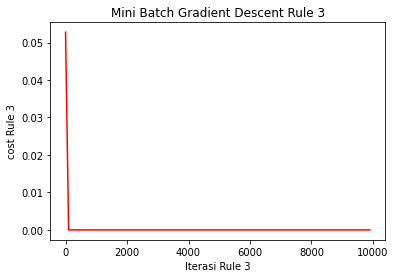

In [81]:
plt.xlabel("Iterasi Rule 3")
plt.ylabel("cost Rule 3")
plt.title("Mini Batch Gradient Descent Rule 3")
plt.plot(mb_iterasi_rule3_list,mb_cost_rule3_list, color='red', label='Eror')
plt.show()

In [82]:
mb_cost_rule3

0.0

In [83]:
mb_b0_rule3

-1e-323

In [84]:
mb_bpoly_rule3 #hasil untuk x1 dan x2

array([ 5.4e-323,  3.5e-323, -7.9e-323,  4.9e-323])

In [85]:
data_rule_3

,VA,CA,RS,chlorides,quality
6,0.650,0.00,1.2,0.065,1
7,0.580,0.02,2.0,0.073,1
14,0.645,0.00,5.5,0.086,1
15,0.600,0.14,2.4,0.086,1
27,0.600,0.17,2.3,0.058,1
...,...,...,...,...,...
389,0.610,0.11,1.8,0.066,1
390,0.660,0.33,2.5,0.068,1
392,0.550,0.15,1.8,0.077,1
394,0.620,0.08,1.9,0.068,1


In [86]:
X3=np.array(data_rule_3.iloc[::,:-1])
X3

array([[0.65 , 0.   , 1.2  , 0.065],
       [0.58 , 0.02 , 2.   , 0.073],
       [0.645, 0.   , 5.5  , 0.086],
       [0.6  , 0.14 , 2.4  , 0.086],
       [0.6  , 0.17 , 2.3  , 0.058],
       [0.61 , 0.3  , 2.1  , 0.084],
       [0.6  , 0.18 , 1.9  , 0.079],
       [0.62 , 0.05 , 1.9  , 0.068],
       [0.62 , 0.21 , 1.9  , 0.079],
       [0.725, 0.24 , 2.8  , 0.083],
       [0.735, 0.08 , 2.4  , 0.092],
       [1.   , 0.09 , 2.3  , 0.065],
       [0.63 , 0.   , 1.9  , 0.097],
       [0.63 , 0.   , 1.9  , 0.097],
       [0.645, 0.   , 1.9  , 0.097],
       [0.63 , 0.   , 1.9  , 0.097],
       [1.   , 0.09 , 2.3  , 0.065],
       [0.58 , 0.1  , 1.8  , 0.102],
       [0.66 , 0.   , 2.   , 0.084],
       [0.64 , 0.1  , 6.   , 0.115],
       [0.72 , 0.09 , 2.8  , 0.084],
       [0.865, 0.03 , 3.2  , 0.071],
       [0.91 , 0.07 , 1.9  , 0.058],
       [0.98 , 0.01 , 2.   , 0.057],
       [0.7  , 0.   , 1.7  , 0.069],
       [0.68 , 0.11 , 2.8  , 0.093],
       [0.67 , 0.1  , 3.   , 0.091],
 

In [87]:
Y3=np.array(data_rule_3.iloc[:,2])
Y3

array([1.2, 2. , 5.5, 2.4, 2.3, 2.1, 1.9, 1.9, 1.9, 2.8, 2.4, 2.3, 1.9,
       1.9, 1.9, 1.9, 2.3, 1.8, 2. , 6. , 2.8, 3.2, 1.9, 2. , 1.7, 2.8,
       3. , 2.4, 2.4, 2. , 1.8, 2.5, 2.1, 2.2, 2.3, 2.3, 2.4, 1.6, 2. ,
       4.8, 2.7, 2.7, 2.1, 2.3, 1.9, 2.3, 2. , 2.7, 2.1, 2.1, 1.4, 2.4,
       2.3, 1.9, 2.1, 3.1, 2.6, 2.6, 1.6, 2.2, 2.2, 5.2, 2.1, 2. , 2.1,
       2.4, 2.2, 1.9, 3.7, 2.4, 1.7, 2.4, 1.9, 1.8, 2.5, 1.8, 1.9, 2.2])

In [88]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X3_poly = poly_reg.fit_transform(X3)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X3_poly, Y3) 
# Proses Training Model
poly_reg.fit(X3, Y3) 

# Memprediksi hasil dengan regresi polynomial
y3_pred=lin_reg_2.predict(poly_reg.fit_transform(X3))
y3_pred

data_rule_3['pred'] = y3_pred
data_rule_3

,VA,CA,RS,chlorides,quality,pred
6,0.650,0.00,1.2,0.065,1,1.2
7,0.580,0.02,2.0,0.073,1,2.0
14,0.645,0.00,5.5,0.086,1,5.5
15,0.600,0.14,2.4,0.086,1,2.4
27,0.600,0.17,2.3,0.058,1,2.3
...,...,...,...,...,...,...
389,0.610,0.11,1.8,0.066,1,1.8
390,0.660,0.33,2.5,0.068,1,2.5
392,0.550,0.15,1.8,0.077,1,1.8
394,0.620,0.08,1.9,0.068,1,1.9


##Rule 4

In [98]:
# Rule 4
rule_4 = df_fuzz[df_fuzz['Rule']==" Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan X4 Lebih maka Y Bad"]
index=rule_4.index
data_rule_4=df_fuzz.iloc[index,:5]
data_rule_4

,VA,CA,RS,chlorides,quality
8,0.50,0.36,6.1,0.071,2
10,0.50,0.36,6.1,0.071,2
13,0.32,0.25,1.8,0.103,2
19,0.38,0.36,3.0,0.081,2
22,0.52,0.26,1.9,0.079,2
...,...,...,...,...,...
345,0.47,0.46,2.2,0.114,2
348,0.32,0.25,2.3,0.071,2
349,0.48,0.25,2.0,0.076,2
351,0.48,0.08,2.1,0.064,2


In [99]:
data_rule_4.to_csv('hasilrule4.csv') 

###Mini Batch Gradient Descent

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [101]:
df_rule4=pd.read_csv('hasilrule4.csv',sep=',')
df_rule4

,Unnamed: 0,VA,CA,RS,chlorides,quality
0,8,0.50,0.36,6.1,0.071,2
1,10,0.50,0.36,6.1,0.071,2
2,13,0.32,0.25,1.8,0.103,2
3,19,0.38,0.36,3.0,0.081,2
4,22,0.52,0.26,1.9,0.079,2
...,...,...,...,...,...,...
68,345,0.47,0.46,2.2,0.114,2
69,348,0.32,0.25,2.3,0.071,2
70,349,0.48,0.25,2.0,0.076,2
71,351,0.48,0.08,2.1,0.064,2


In [102]:
df_rule4=df_rule4.drop(columns=['Unnamed: 0'])
df_rule4

,VA,CA,RS,chlorides,quality
0,0.50,0.36,6.1,0.071,2
1,0.50,0.36,6.1,0.071,2
2,0.32,0.25,1.8,0.103,2
3,0.38,0.36,3.0,0.081,2
4,0.52,0.26,1.9,0.079,2
...,...,...,...,...,...
68,0.47,0.46,2.2,0.114,2
69,0.32,0.25,2.3,0.071,2
70,0.48,0.25,2.0,0.076,2
71,0.48,0.08,2.1,0.064,2


In [103]:
from sklearn import preprocessing
sx4 = preprocessing.MinMaxScaler()
sy4 = preprocessing.MinMaxScaler()

scaled_X4 = sx4.fit_transform(data_rule_4.drop('quality',axis='columns'))
scaled_y4 = sy4.fit_transform(data_rule_4['quality'].values.reshape(rule_4.shape[0],1))

scaled_X4

array([[0.84615385, 0.6       , 0.95918367, 0.39189189],
       [0.84615385, 0.6       , 0.95918367, 0.39189189],
       [0.15384615, 0.41666667, 0.08163265, 0.82432432],
       [0.38461538, 0.6       , 0.32653061, 0.52702703],
       [0.92307692, 0.43333333, 0.10204082, 0.5       ],
       [0.80769231, 0.48333333, 0.12244898, 0.91891892],
       [0.80769231, 0.43333333, 0.10204082, 0.27027027],
       [0.84615385, 0.41666667, 0.12244898, 0.37837838],
       [0.80769231, 0.4       , 0.16326531, 0.37837838],
       [0.57692308, 0.7       , 0.83673469, 0.37837838],
       [0.57692308, 0.7       , 0.83673469, 0.39189189],
       [0.57692308, 0.7       , 0.83673469, 0.37837838],
       [0.57692308, 0.7       , 0.83673469, 0.39189189],
       [0.38461538, 0.35      , 0.12244898, 0.51351351],
       [0.84615385, 0.06666667, 0.02040816, 0.58108108],
       [0.38461538, 0.35      , 0.12244898, 0.51351351],
       [0.11538462, 0.95      , 0.12244898, 0.93243243],
       [0.84615385, 0.55      ,

In [104]:
scaled_y4_reshape=scaled_y4.reshape(scaled_y4.shape[0],)
scaled_y4_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [105]:
def mini_batch_gradient_descent_rule4(X4, y4, iterasi, batch_size = 5, learning_rate = 0.1):

    jumlah_variabel_rule4 = X4.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule4 = np.ones(shape=(jumlah_variabel_rule4))       # b1, b2, ... b(jumlah variabel)
    b0_rule4 = 0                                         # b0 atau bias
    n = X4.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule4_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule4_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule4_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule4 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X4_smntr = X4[random_indices]
        y4_smntr = y4[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule4 = X4_smntr[j:j+batch_size]
            yj_rule4 = y4_smntr[j:j+batch_size]
            
            y4_pred = np.dot(bpoly_rule4, Xj_rule4.T) + b0_rule4           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule4_grad = -(2/len(Xj_rule4))*(Xj_rule4.T.dot(yj_rule4-y4_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule4_grad = -(2/len(Xj_rule4))*np.sum(yj_rule4-y4_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule4 = bpoly_rule4 - learning_rate * bpoly_rule4_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule4 = b0_rule4 - learning_rate * b0_rule4_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule4 in range(jumlah_variabel_rule4):
                bp_rule4=bpoly_rule4[jv_rule4]
                bp.append(bp_rule4)
            b_rule4=[b0_rule4]+bp
        
            cost_rule4 = np.mean(np.square(yj_rule4-y4_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule4_list.append(cost_rule4)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule4_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule4_list.append(b_rule4)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule4, b0_rule4, cost_rule4, b_rule4_list, cost_rule4_list, iterasi_rule4_list  # Output

In [106]:
import time
mulai_rule4 = time.time()
mb_bpoly_rule4, mb_b0_rule4, mb_cost_rule4, mb_b_rule4_list, mb_cost_rule4_list, mb_iterasi_rule4_list=mini_batch_gradient_descent_rule4 (scaled_X4, 
                                                                                                                                        scaled_y4_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule4 = time.time()
waktu_komputasi_rule4 = (selesai_rule4 - mulai_rule4)
print("Waktu Komputasi Rule 4: ",waktu_komputasi_rule4)

Waktu Komputasi Rule 4:  7.686012268066406


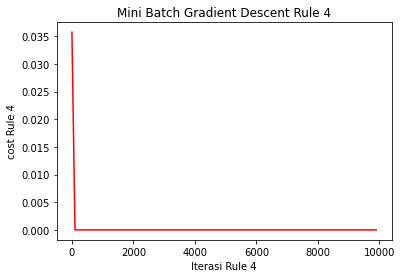

In [107]:
plt.xlabel("Iterasi Rule 4")
plt.ylabel("cost Rule 4")
plt.title("Mini Batch Gradient Descent Rule 4")
plt.plot(mb_iterasi_rule4_list,mb_cost_rule4_list, color='red', label='Eror')
plt.show()

In [108]:
mb_cost_rule4

0.0

In [109]:
mb_b0_rule4

-2e-323

In [110]:
mb_bpoly_rule4 #hasil untuk x1 dan x2

array([ 3.5e-323,  6.9e-323, -8.4e-323, -1.5e-323])

In [111]:
data_rule_4

,VA,CA,RS,chlorides,quality
8,0.50,0.36,6.1,0.071,2
10,0.50,0.36,6.1,0.071,2
13,0.32,0.25,1.8,0.103,2
19,0.38,0.36,3.0,0.081,2
22,0.52,0.26,1.9,0.079,2
...,...,...,...,...,...
345,0.47,0.46,2.2,0.114,2
348,0.32,0.25,2.3,0.071,2
349,0.48,0.25,2.0,0.076,2
351,0.48,0.08,2.1,0.064,2


In [112]:
X4=np.array(data_rule_4.iloc[::,:-1])
X4

array([[0.5  , 0.36 , 6.1  , 0.071],
       [0.5  , 0.36 , 6.1  , 0.071],
       [0.32 , 0.25 , 1.8  , 0.103],
       [0.38 , 0.36 , 3.   , 0.081],
       [0.52 , 0.26 , 1.9  , 0.079],
       [0.49 , 0.29 , 2.   , 0.11 ],
       [0.49 , 0.26 , 1.9  , 0.062],
       [0.5  , 0.25 , 2.   , 0.07 ],
       [0.49 , 0.24 , 2.2  , 0.07 ],
       [0.43 , 0.42 , 5.5  , 0.07 ],
       [0.43 , 0.42 , 5.5  , 0.071],
       [0.43 , 0.42 , 5.5  , 0.07 ],
       [0.43 , 0.42 , 5.5  , 0.071],
       [0.38 , 0.21 , 2.   , 0.08 ],
       [0.5  , 0.04 , 1.5  , 0.085],
       [0.38 , 0.21 , 2.   , 0.08 ],
       [0.31 , 0.57 , 2.   , 0.111],
       [0.5  , 0.33 , 2.   , 0.084],
       [0.49 , 0.49 , 5.6  , 0.06 ],
       [0.52 , 0.25 , 2.6  , 0.081],
       [0.34 , 0.37 , 2.2  , 0.075],
       [0.33 , 0.23 , 1.7  , 0.077],
       [0.52 , 0.03 , 1.7  , 0.07 ],
       [0.37 , 0.23 , 1.8  , 0.077],
       [0.45 , 0.35 , 2.4  , 0.08 ],
       [0.52 , 0.34 , 2.7  , 0.087],
       [0.45 , 0.49 , 2.6  , 0.084],
 

In [113]:
Y4=np.array(data_rule_4.iloc[:,2])
Y4

array([6.1 , 6.1 , 1.8 , 3.  , 1.9 , 2.  , 1.9 , 2.  , 2.2 , 5.5 , 5.5 ,
       5.5 , 5.5 , 2.  , 1.5 , 2.  , 2.  , 2.  , 5.6 , 2.6 , 2.2 , 1.7 ,
       1.7 , 1.8 , 2.4 , 2.7 , 2.6 , 2.6 , 3.5 , 2.3 , 2.3 , 2.3 , 2.3 ,
       2.2 , 2.5 , 3.4 , 2.6 , 2.4 , 2.4 , 2.3 , 2.3 , 2.1 , 1.9 , 1.9 ,
       2.5 , 2.  , 2.6 , 2.8 , 2.1 , 2.  , 1.65, 1.9 , 6.3 , 2.3 , 1.4 ,
       1.4 , 1.4 , 1.8 , 1.8 , 2.2 , 2.2 , 2.  , 3.  , 3.  , 1.5 , 1.7 ,
       1.7 , 2.3 , 2.2 , 2.3 , 2.  , 2.1 , 1.8 ])

In [114]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X4_poly = poly_reg.fit_transform(X4)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X4_poly, Y4) 
# Proses Training Model
poly_reg.fit(X4, Y4) 

# Memprediksi hasil dengan regresi polynomial
y4_pred=lin_reg_2.predict(poly_reg.fit_transform(X4))
y4_pred

data_rule_4['pred'] = y4_pred
data_rule_4

,VA,CA,RS,chlorides,quality,pred
8,0.50,0.36,6.1,0.071,2,6.1
10,0.50,0.36,6.1,0.071,2,6.1
13,0.32,0.25,1.8,0.103,2,1.8
19,0.38,0.36,3.0,0.081,2,3.0
22,0.52,0.26,1.9,0.079,2,1.9
...,...,...,...,...,...,...
345,0.47,0.46,2.2,0.114,2,2.2
348,0.32,0.25,2.3,0.071,2,2.3
349,0.48,0.25,2.0,0.076,2,2.0
351,0.48,0.08,2.1,0.064,2,2.1


##Rule 5

In [115]:
#Rule 5
rule_5 = df_fuzz[df_fuzz['Rule']==" Jika X1 Lambat dan X2 Tinggi dan X3 Banyak dan X4 Kurang maka Y Bad"]
index=rule_5.index
data_rule_5=df_fuzz.iloc[index,:5]
data_rule_5

,VA,CA,RS,chlorides,quality
50,0.705,0.24,1.8,0.360,2
131,0.550,0.66,2.3,0.387,2
215,0.635,0.68,1.8,0.403,2
276,0.780,0.51,1.7,0.415,2
278,0.780,0.51,1.7,0.415,2


In [116]:
data_rule_5.to_csv('hasilrule5.csv') 

###Mini Batch Gradient Descent

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [118]:
df_rule5=pd.read_csv('hasilrule5.csv',sep=',')
df_rule5

,Unnamed: 0,VA,CA,RS,chlorides,quality
0,50,0.705,0.24,1.8,0.360,2
1,131,0.550,0.66,2.3,0.387,2
2,215,0.635,0.68,1.8,0.403,2
3,276,0.780,0.51,1.7,0.415,2
4,278,0.780,0.51,1.7,0.415,2


In [119]:
df_rule5=df_rule5.drop(columns=['Unnamed: 0'])
df_rule5

,VA,CA,RS,chlorides,quality
0,0.705,0.24,1.8,0.360,2
1,0.550,0.66,2.3,0.387,2
2,0.635,0.68,1.8,0.403,2
3,0.780,0.51,1.7,0.415,2
4,0.780,0.51,1.7,0.415,2


In [120]:
from sklearn import preprocessing
sx5 = preprocessing.MinMaxScaler()
sy5 = preprocessing.MinMaxScaler()

scaled_X5 = sx5.fit_transform(data_rule_5.drop('quality',axis='columns'))
scaled_y5 = sy5.fit_transform(data_rule_5['quality'].values.reshape(rule_5.shape[0],1))

scaled_X5

array([[0.67391304, 0.        , 0.16666667, 0.        ],
       [0.        , 0.95454545, 1.        , 0.49090909],
       [0.36956522, 1.        , 0.16666667, 0.78181818],
       [1.        , 0.61363636, 0.        , 1.        ],
       [1.        , 0.61363636, 0.        , 1.        ]])

In [121]:
scaled_y5_reshape=scaled_y5.reshape(scaled_y5.shape[0],)
scaled_y5_reshape

array([0., 0., 0., 0., 0.])

In [122]:
def mini_batch_gradient_descent_rule5(X5, y5, iterasi, batch_size = 5, learning_rate = 0.1):

    jumlah_variabel_rule5 = X5.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule5 = np.ones(shape=(jumlah_variabel_rule5))       # b1, b2, ... b(jumlah variabel)
    b0_rule5 = 0                                         # b0 atau bias
    n = X5.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule5_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule5_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule5_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule5 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X5_smntr = X5[random_indices]
        y5_smntr = y5[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule5 = X5_smntr[j:j+batch_size]
            yj_rule5 = y5_smntr[j:j+batch_size]
            
            y5_pred = np.dot(bpoly_rule5, Xj_rule5.T) + b0_rule5          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule5_grad = -(2/len(Xj_rule5))*(Xj_rule5.T.dot(yj_rule5-y5_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule5_grad = -(2/len(Xj_rule5))*np.sum(yj_rule5-y5_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule5 = bpoly_rule5 - learning_rate * bpoly_rule5_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule5 = b0_rule5 - learning_rate * b0_rule5_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule5 in range(jumlah_variabel_rule5):
                bp_rule5=bpoly_rule5[jv_rule5]
                bp.append(bp_rule5)
            b_rule5=[b0_rule5]+bp
        
            cost_rule5 = np.mean(np.square(yj_rule5-y5_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule5_list.append(cost_rule5)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule5_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule5_list.append(b_rule5)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule5, b0_rule5, cost_rule5, b_rule5_list, cost_rule5_list, iterasi_rule5_list  # Output

In [123]:
import time
mulai_rule5 = time.time()
mb_bpoly_rule5, mb_b0_rule5, mb_cost_rule5, mb_b_rule5_list, mb_cost_rule5_list, mb_iterasi_rule5_list=mini_batch_gradient_descent_rule5 (scaled_X5, 
                                                                                                                                        scaled_y5_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule5 = time.time()
waktu_komputasi_rule5 = (selesai_rule5 - mulai_rule5)
print("Waktu Komputasi Rule 5: ",waktu_komputasi_rule5)

Waktu Komputasi Rule 5:  2.7898895740509033


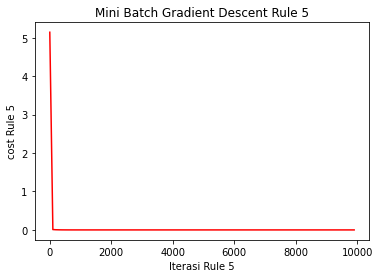

In [180]:
plt.xlabel("Iterasi Rule 5")
plt.ylabel("cost Rule 5")
plt.title("Mini Batch Gradient Descent Rule 5")
plt.plot(mb_iterasi_rule5_list,mb_cost_rule5_list, color='red', label='Eror')
plt.show()

In [124]:
mb_cost_rule5

2.4454688061851367e-30

In [125]:
mb_b0_rule5

-0.2599977118420597

In [126]:
mb_bpoly_rule5 #hasil untuk x1 dan x2

array([ 0.36978151,  0.38130506,  0.06478278, -0.34376645])

In [127]:
data_rule_5

,VA,CA,RS,chlorides,quality
50,0.705,0.24,1.8,0.360,2
131,0.550,0.66,2.3,0.387,2
215,0.635,0.68,1.8,0.403,2
276,0.780,0.51,1.7,0.415,2
278,0.780,0.51,1.7,0.415,2


In [128]:
X5=np.array(data_rule_5.iloc[::,:-1])
X5

array([[0.705, 0.24 , 1.8  , 0.36 ],
       [0.55 , 0.66 , 2.3  , 0.387],
       [0.635, 0.68 , 1.8  , 0.403],
       [0.78 , 0.51 , 1.7  , 0.415],
       [0.78 , 0.51 , 1.7  , 0.415]])

In [129]:
Y5=np.array(data_rule_5.iloc[:,2])
Y5

array([1.8, 2.3, 1.8, 1.7, 1.7])

In [130]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X5_poly = poly_reg.fit_transform(X5)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X5_poly, Y5) 
# Proses Training Model
poly_reg.fit(X5, Y5) 

# Memprediksi hasil dengan regresi polynomial
y5_pred=lin_reg_2.predict(poly_reg.fit_transform(X5))
y5_pred

data_rule_5['pred'] = y5_pred
data_rule_5

,VA,CA,RS,chlorides,quality,pred
50,0.705,0.24,1.8,0.360,2,1.8
131,0.550,0.66,2.3,0.387,2,2.3
215,0.635,0.68,1.8,0.403,2,1.8
276,0.780,0.51,1.7,0.415,2,1.7
278,0.780,0.51,1.7,0.415,2,1.7


##Rule 6

In [198]:
#Rule 6
rule_6 = df_fuzz[df_fuzz['Rule']==" Jika X1 Lambat dan X2 Tinggi dan X3 Sedikit dan X4 Lebih maka Y Bad"]
index=rule_6.index
data_rule_6=df_fuzz.iloc[index,:5]
data_rule_6

,VA,CA,RS,chlorides,quality
110,0.595,0.41,7.9,0.086,2
195,0.770,0.20,8.1,0.098,2
210,0.800,0.03,7.8,0.079,2
391,0.725,0.20,7.8,0.073,2


In [199]:
data_rule_6.to_csv('hasilrule6.csv') 

###Mini Batch Gradient Descent

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [201]:
df_rule6=pd.read_csv('hasilrule6.csv',sep=',')
df_rule6

,Unnamed: 0,VA,CA,RS,chlorides,quality
0,110,0.595,0.41,7.9,0.086,2
1,195,0.770,0.20,8.1,0.098,2
2,210,0.800,0.03,7.8,0.079,2
3,391,0.725,0.20,7.8,0.073,2


In [202]:
df_rule6=df_rule6.drop(columns=['Unnamed: 0'])
df_rule6

,VA,CA,RS,chlorides,quality
0,0.595,0.41,7.9,0.086,2
1,0.770,0.20,8.1,0.098,2
2,0.800,0.03,7.8,0.079,2
3,0.725,0.20,7.8,0.073,2


In [203]:
from sklearn import preprocessing
sx6 = preprocessing.MinMaxScaler()
sy6 = preprocessing.MinMaxScaler()

scaled_X6 = sx6.fit_transform(data_rule_6.drop('quality',axis='columns'))
scaled_y6 = sy6.fit_transform(data_rule_6['quality'].values.reshape(rule_6.shape[0],1))

scaled_X6

array([[0.        , 1.        , 0.33333333, 0.52      ],
       [0.85365854, 0.44736842, 1.        , 1.        ],
       [1.        , 0.        , 0.        , 0.24      ],
       [0.63414634, 0.44736842, 0.        , 0.        ]])

In [204]:
scaled_y6_reshape=scaled_y6.reshape(scaled_y6.shape[0],)
scaled_y6_reshape

array([0., 0., 0., 0.])

In [205]:
def mini_batch_gradient_descent_rule6(X6, y6, iterasi, batch_size = 3, learning_rate = 0.1):

    jumlah_variabel_rule6 = X6.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule6 = np.ones(shape=(jumlah_variabel_rule6))       # b1, b2, ... b(jumlah variabel)
    b0_rule6 = 0                                         # b0 atau bias
    n = X6.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule6_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule6_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule6_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule6 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X6_smntr = X6[random_indices]
        y6_smntr = y6[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule6 = X6_smntr[j:j+batch_size]
            yj_rule6 = y6_smntr[j:j+batch_size]
            
            y6_pred = np.dot(bpoly_rule6, Xj_rule6.T) + b0_rule6          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule6_grad = -(2/len(Xj_rule6))*(Xj_rule6.T.dot(yj_rule6-y6_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule6_grad = -(2/len(Xj_rule6))*np.sum(yj_rule6-y6_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule6 = bpoly_rule6 - learning_rate * bpoly_rule6_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule6 = b0_rule6 - learning_rate * b0_rule6_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule6 in range(jumlah_variabel_rule6):
                bp_rule6=bpoly_rule6[jv_rule6]
                bp.append(bp_rule6)
            b_rule6=[b0_rule6]+bp
        
            cost_rule6 = np.mean(np.square(yj_rule6-y6_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule6_list.append(cost_rule6)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule6_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule6_list.append(b_rule6)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule6, b0_rule6, cost_rule6, b_rule6_list, cost_rule6_list, iterasi_rule6_list  # Output

In [206]:
import time
mulai_rule6 = time.time()
mb_bpoly_rule6, mb_b0_rule6, mb_cost_rule6, mb_b_rule6_list, mb_cost_rule6_list, mb_iterasi_rule6_list=mini_batch_gradient_descent_rule6 (scaled_X6, 
                                                                                                                                        scaled_y6_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.1)
selesai_rule6 = time.time()
waktu_komputasi_rule6 = (selesai_rule6 - mulai_rule6)
print("Waktu Komputasi Rule 6: ",waktu_komputasi_rule6)

Waktu Komputasi Rule 6:  3.2247915267944336


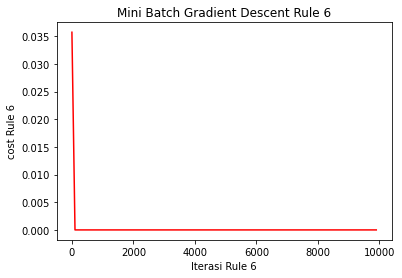

In [207]:
plt.xlabel("Iterasi Rule 6")
plt.ylabel("cost Rule 6")
plt.title("Mini Batch Gradient Descent Rule 6")
plt.plot(mb_iterasi_rule4_list,mb_cost_rule4_list, color='red', label='Eror')
plt.show()

In [208]:
mb_cost_rule6

2.2180012572027236e-25

In [209]:
mb_b0_rule6

-0.4906631824474549

In [210]:
mb_bpoly_rule6 #hasil untuk x1 dan x2

array([ 0.43542478,  0.47956033, -0.32574105,  0.23016   ])

In [211]:
X6=np.array(data_rule_6.iloc[::,:-1])
X6

array([[0.595, 0.41 , 7.9  , 0.086],
       [0.77 , 0.2  , 8.1  , 0.098],
       [0.8  , 0.03 , 7.8  , 0.079],
       [0.725, 0.2  , 7.8  , 0.073]])

In [212]:
Y6=np.array(data_rule_6.iloc[:,2])
Y6

array([7.9, 8.1, 7.8, 7.8])

In [213]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X6_poly = poly_reg.fit_transform(X6)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X6_poly, Y6) 
# Proses Training Model
poly_reg.fit(X6, Y6) 

# Memprediksi hasil dengan regresi polynomial
y6_pred=lin_reg_2.predict(poly_reg.fit_transform(X6))
y6_pred

data_rule_6['pred'] = y6_pred
data_rule_6

,VA,CA,RS,chlorides,quality,pred
110,0.595,0.41,7.9,0.086,2,7.9
195,0.770,0.20,8.1,0.098,2,8.1
210,0.800,0.03,7.8,0.079,2,7.8
391,0.725,0.20,7.8,0.073,2,7.8


#Prediksi

In [214]:
df_pred=pd.concat([data_rule_1, data_rule_2, data_rule_3, data_rule_4, data_rule_5, data_rule_6], ignore_index=False)
df_pred.sort_index()

,VA,CA,RS,chlorides,quality,pred
0,0.700,0.00,1.9,0.076,2,1.9
1,0.880,0.00,2.6,0.098,2,2.6
2,0.760,0.04,2.3,0.092,2,2.3
3,0.700,0.00,1.9,0.076,2,1.9
4,0.660,0.00,1.8,0.075,2,1.8
...,...,...,...,...,...,...
395,0.600,0.08,2.0,0.090,2,2.0
396,0.550,0.10,2.2,0.062,1,2.2
397,0.510,0.13,2.3,0.076,1,2.3
398,0.645,0.12,2.0,0.075,2,2.0


In [215]:
df_pred.to_excel('hasil_prediksi.xlsx') 

In [216]:
df_fuzz['alpha_predikat']=df_fuzz[['miu_VA','miu_CA','miu_RS','miu_chlorides','miu_quality']].min(axis=1)
df_fuzz

,VA,CA,RS,chlorides,quality,VA_fuzz,CA_fuzz,RS_fuzz,chlorides_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_chlorides,miu_quality,Rule,alpha_predikat
0,0.700,0.00,1.9,0.076,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0
1,0.880,0.00,2.6,0.098,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0
2,0.760,0.04,2.3,0.092,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0
3,0.700,0.00,1.9,0.076,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0
4,0.660,0.00,1.8,0.075,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.600,0.08,2.0,0.090,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0
396,0.550,0.10,2.2,0.062,1,Lambat,Tinggi,Banyak,Lebih,Good,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0
397,0.510,0.13,2.3,0.076,1,Cepat,Tinggi,Banyak,Lebih,Good,0.0,0.0,0.123288,0.0,0.0,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan...,0.0
398,0.645,0.12,2.0,0.075,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0


In [217]:
df_fuzz['y_pred_regressi']=df_pred.pred
df_fuzz

,VA,CA,RS,chlorides,quality,VA_fuzz,CA_fuzz,RS_fuzz,chlorides_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_chlorides,miu_quality,Rule,alpha_predikat,y_pred_regressi
0,0.700,0.00,1.9,0.076,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,1.9
1,0.880,0.00,2.6,0.098,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,2.6
2,0.760,0.04,2.3,0.092,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,2.3
3,0.700,0.00,1.9,0.076,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,1.9
4,0.660,0.00,1.8,0.075,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.600,0.08,2.0,0.090,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,2.0
396,0.550,0.10,2.2,0.062,1,Lambat,Tinggi,Banyak,Lebih,Good,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,2.2
397,0.510,0.13,2.3,0.076,1,Cepat,Tinggi,Banyak,Lebih,Good,0.0,0.0,0.123288,0.0,0.0,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan...,0.0,2.3
398,0.645,0.12,2.0,0.075,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,2.0


In [218]:
#df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']/df_fuzz['alpha_predikat'].sum()
df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']
df_fuzz

,VA,CA,RS,chlorides,quality,VA_fuzz,CA_fuzz,RS_fuzz,chlorides_fuzz,quality_fuzz,miu_VA,miu_CA,miu_RS,miu_chlorides,miu_quality,Rule,alpha_predikat,y_pred_regressi,Pred TSK
0,0.700,0.00,1.9,0.076,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,1.9,0.0
1,0.880,0.00,2.6,0.098,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,2.6,0.0
2,0.760,0.04,2.3,0.092,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,2.3,0.0
3,0.700,0.00,1.9,0.076,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,1.9,0.0
4,0.660,0.00,1.8,0.075,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.054795,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.600,0.08,2.0,0.090,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,2.0,0.0
396,0.550,0.10,2.2,0.062,1,Lambat,Tinggi,Banyak,Lebih,Good,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,2.2,0.0
397,0.510,0.13,2.3,0.076,1,Cepat,Tinggi,Banyak,Lebih,Good,0.0,0.0,0.123288,0.0,0.0,Jika X1 Cepat dan X2 Tinggi dan X3 Banyak dan...,0.0,2.3,0.0
398,0.645,0.12,2.0,0.075,2,Lambat,Tinggi,Banyak,Lebih,Bad,0.0,0.0,0.123288,0.0,0.0,Jika X1 Lambat dan X2 Tinggi dan X3 Banyak da...,0.0,2.0,0.0


In [220]:
x1= df_fuzz.index
y1= df_fuzz.quality
y2= df_fuzz['Pred TSK']

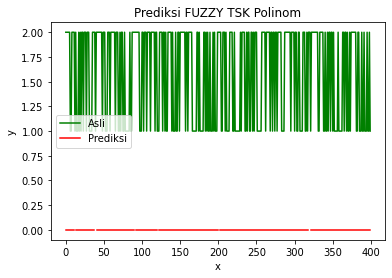

In [221]:
plt.plot(x1, y1,  label = "Asli",  color='green')
plt.plot(x1, y2, label = "Prediksi", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediksi FUZZY TSK Polinom')
plt.legend()
plt.show()